# Introduction to Machine Learning Code Supplement

In [171]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

## Exercises: What type of ML could you use to approach these problems?

Note: for some of these, there's no one right answer! It's all about how you frame the specific problem. Discuss with the person next to you.

1) Suppose you wanted to make a robot that can avoid colliding with other objects. What kind of learning? (supervised, unsupervised, etc.) Would you use classification or regression?  

2) Suppose that given an audio file, you want to figure out if the person is saying 'cat' or 'dog'. What kind of learning? (supervised, unsupervised, etc.) Would you use classification or regression?  

3) Suppose you wanted to make an AI that can find some trends in numerical galaxy data. You're not sure what trends you want, but you really just want to let your AI run wild! What kind of learning? (supervised, unsupervised, etc.) Would you use classification or regression?

## Feature Selection

Feature selection is very important because if we put unhelpful, noisy data in, then we're going to get strange results. By using feature selection, the model trains faster, and can improve its accuracy.

### Qualitative Feature Selection Example: Cancer Detection

Suppose that given a specific person, we're trying to predict whether or not they have cancer. Below are a list of potential features.

Tumor Size  
Gender  
Location of Tumor
Address of the Hospital where a Patient is Treated  
Hospital Name (where Patient was Diagnosed)

Which features would you keep? Which features would you drop?  
Discuss with the person next to you.

## Evaluating Our Model

### What does our data look like?

Continuing with our cancer example, let's look at a standard breast cancer dataset and practice evaluating a classification model.

In [172]:
cancer = datasets.load_breast_cancer() # Load the cancer dataset from scikit-learn

print("Feature Names")
print(cancer.feature_names) # These are all the different features in the dataset. Would you consider dropping 
# one of these features?
print('')

print("Names of Classes")
print(cancer.target_names)
# We find that either a tumor is 'malignant' or it is 'benign'.

Feature Names
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Names of Classes
['malignant' 'benign']


Text(0,0.5,'Mean texture')

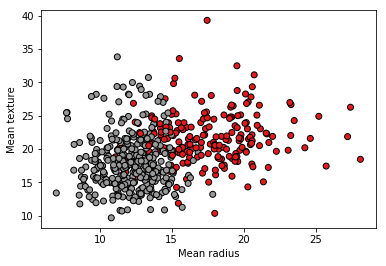

In [173]:
# Now, let's plot our data and see if we see any correlation between two features!

X = cancer.data
y = cancer.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')

Do you see any clear data trends? Plotting helps machine learning researchers get a feel for what the data looks like. 

### Evaluating the Model

Now, let's make a decision tree model which, given an arbitrary tumor, identifies whether it is malignant or benign.

We want to figure out how well it is doing. Don't worry too much if some of the code goes over your head; the main focus is on evaluating our model.

In [174]:
classifier = DecisionTreeClassifier()
X = cancer.data # X, what we're using to predict, is the features
y = cancer.target # y, what we're predicting, is the classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # We split the data into 'train' and 'test'
classifier.fit(X_train, y_train) # Put these into the classifier
prediction = classifier.predict(X_test)
# Note that these predictions aren't necessarily correct

### Accuracy

The accuracy, as we normally think of it, is defined as the number of correct predictions / total predictions.

#### Calculating the Correct and Total Predictions

In [175]:
# From scratch way

correct = [] # This list stores every prediction that was correct
for i in range(0, len(y_test)): # Iterate through all of our predictions
        if (y_test[i] == prediction[i]): # If our prediction matches the actual value,
            correct.append(y_test[i]) # then put it in the 'correct' list

num_correct = len(correct)
num_pred = len(y_test)

#### Practice

Using the accuracy formula, define accuracy in terms of num_correct and num_pred.

In [176]:
# TODO:
accuracy = 0
# Our accuracy is defined by the number of 
print("Accuracy:")
print(accuracy)

Accuracy:
0


In [177]:
# A faster way is to do it with a built-in function, accuracy_score
from sklearn.metrics import accuracy_score
print("Accuracy:")
accuracy_score(y_test, prediction)

Accuracy:


0.9385964912280702

### Precision

The formula for precision is (true positive)/(true positive + false positive).

#### Calculating the Number of True Positives


A true positive is a tumor prediction that says 'malignant' and matches with the correct value (in y_test).
Note: 1 = 'malignant' and 0 = 'benign'
To calculate the number of true positives, let's iterate through and find predictions that are both 'malignant' and correct.

In [178]:
true_positive = []
for i in range(0, len(y_test)): # Iterate through all of our predictions
        if (prediction[i] == 1 and y_test[i] == prediction[i]): # If we predict malignant and our prediction is correct
            true_positive.append(y_test[i]) # then this prediction is a true positive

#### Calculating the Number of False Positives

A false positive is a tumor prediction that says 'malignant' and does NOT match with the correct value (in y_test). To calculate the number of false positives, let's go through all of our predictions and see which ones are 'malignant' and don't match their correct values.

In [180]:
false_positive = []
for i in range(0, len(y_test)): # Iterate through all of our predictions
        if (prediction[i] == 1 and y_test[i] != prediction[i]): # If we predict malignant and our prediction is incorrect
            false_positive.append(y_test[i]) # then this prediction is a false positive

Now we define num_true_pos as the length of the true positives list, and num_false_pos similarly.

In [170]:
num_true_pos = len(true_positive)
num_false_pos = len(false_positive)

#### Practice

Your task is to now use num_true_pos and num_false_pos to calculate the precision, with our formula: precision = (true positive)/(true positive + false positive).

In [157]:
# TODO: Define variable 'precision' in terms of num_true_pos and num_false_pos, using our formula.
precision = 0

print("Precision: ")
print(precision)

Precision: 
0


### Recall

The formula for recall is (true positive)/(true positive + false negative).  
We can use the true_positive array from earlier, so now all we have to calculate is a false_negative.

#### Calculating False Negatives

In [184]:
false_negative = []
for i in range(0, len(y_test)):
    if (prediction[i] == 0 and y_test[i] != prediction[i]):
        false_negative.append(y_test[i])

num_false_neg = len(false_negative)

#### Practice

Your task is to define the 'recall' variable in terms of num_true_pos and num_false_neg. Remember that recall = (true positive)/(true positive + false negative).

In [185]:
# TODO: Define variable 'recall' in terms of num_true_pos and num_false_neg.
recall = 0
print("Recall:")
print(recall)

Recall:
0


### F1

The formula for calculating F1 is 2 x (precision x recall)/(precision + recall).


#### Practice

In [183]:
# TODO: Define f1 in terms of the precision and recall variables.
f1 = 0
print(f1)

0


## Questions

1. Given that we're doing a cancer detection task, which error is worse: a false positive (reporting that a tumor is malignant when it actually isn't) or a false negative (reporting that a tumor is benign when it's not)?  


2. Precision is best for when it's really bad to have false positives, and recall is the best for when it's bad to have false negatives. Given your answer from above and our precision or recall score, how do you think the model is doing? (5 = amazingly, 1 = very poor)

### Optional--Quantitative Feature Selection

Quantitative feature selection is less important than the qualitative version, yet it is still interesting! It is used for optimizing and getting your code to run faster by dropping pieces of data that don't tell you much about the outcome you're trying to predict.

### Variance Threshold

The idea behind a Variance Threshold is that if a feature doesn't change very much in our dataset, then it must not be useful for predicting something. In other words, if it has a low variance, then it's unimportant.  

An example is if we're trying to predict an elephant's age, and every elephant in our dataset has a trunk. Therefore, knowing that a given elephant has a trunk doesn't tell us anything about its age, and that feature can be dropped.

In order to make one of the columns useless, let's just always keep the second column a 5.
This way, that column really doesn't tell us anything about the data, since it never changes.

In [161]:
X = [[0,5,0], [1,5,2], [3,5,7], [2,5,6], [11,5,135], [12,5,16], [1355,5,1356868]]

# Print X

for i in range(0, len(X)):
    for j in range(0, len(X[i])):
        print(X[i][j], end = " ")
    print('')
    
# Note that the second column always stays the same!

0 5 0 
1 5 2 
3 5 7 
2 5 6 
11 5 135 
12 5 16 
1355 5 1356868 


Variance is the measure of how much a number changes. If we set our threshold to 0.2, then any column with variance <= 0.2 will be dropped.

In [162]:
sel = VarianceThreshold(threshold=(0.2))
X = sel.fit_transform(X)
print(X)

[[      0       0]
 [      1       2]
 [      3       7]
 [      2       6]
 [     11     135]
 [     12      16]
 [   1355 1356868]]
